In [1]:
# импортируем библиотеку pandas для работы с датафреймами
import pandas as pd
# импортируем seaborn для визуализации
import seaborn as sns
# импортируем sklearn для кластеризации
from sklearn.cluster import KMeans 

# загружаем данные
df = pd.read_csv('data/pokemon.csv')
# датасет содержит название покемона, уровень его защиты, силу атаки и скорость
df.head()

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,RealClusters
0,Bulbasaur,318,45,77.634658,50.854702,65,65,45,2
1,Ivysaur,405,60,67.454273,39.202323,80,80,60,1
2,Venusaur,525,80,76.007423,47.605846,100,100,80,2
3,VenusaurMega Venusaur,625,80,77.828031,50.744911,122,120,80,2
4,Charmander,309,39,68.658104,37.890027,60,50,65,1


<AxesSubplot:xlabel='Attack', ylabel='Defense'>

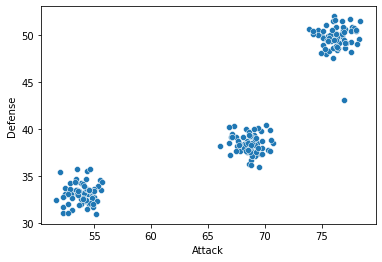

In [2]:
# попробуем кластеризовать покемонов по их силе атаки и уровню защиты
# для этого сохраним в матрицу X два интересующих нас признака: атаку и защиту
X = df[['Attack', 'Defense']]

#визуализируем
sns.scatterplot(x=df.Attack, y=df.Defense)


<AxesSubplot:xlabel='Attack', ylabel='Defense'>

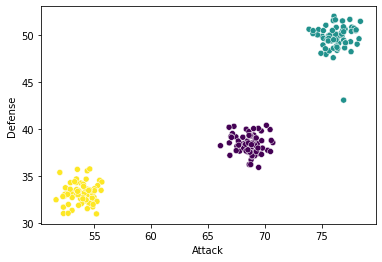

In [3]:
# инициализируем алгоритм k-means с количеством кластеров 3
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)

# запустим обучение модели
kmeans.fit(X)

# предскажем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(X)
# если мы хотим получить метки класса для тех же данных, на которых обучили модель, можно запросить labels
predictions = kmeans.labels_

# сохраним предсказания в датафрейм
df['Clusters_k3'] = predictions

#визуализируем результаты. Параметр c принимает вектор с номерами классов для группировки объектов по цветам 
sns.scatterplot(x=df.Attack, y=df.Defense, c=predictions)

# Метод локтя

Теперь реализуем это в виде кода. Нам нужно посчитать значение инерции для кластеризаций с разным количеством кластеров. Для этого напишем функцию get_inertia, которая будет принимать данные и количество кластеров и возвращать значение инерции:

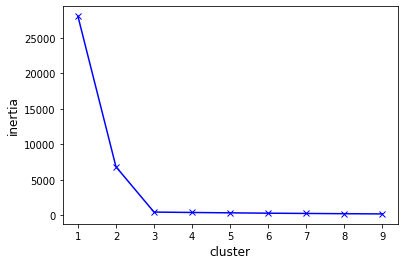

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

# функция, которая принимает количество кластеров для k-means и матрицу с признаками объектов и возвращает инерцию 
def get_inertia(cluster_num, X):
# инициализируем алгоритм кластеризации
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
# запускаем алгоритм k-means
    k_means.fit(X)
# находим значение инерции
    inertia = k_means.inertia_
# возвращаем значение инерции
    return inertia

# создаём пустой список для значений инерции
inertia = []
# итерируемся по разным размерам кластеров (от 1 до 9) и сохраняем значение инерции для каждого кластера
for cluster_num in range(1, 10):
# сохраняем значения
    inertia.append(get_inertia(cluster_num, X))

# визуализируем, как менялась инерция в зависимости от количества кластеров
# задаём названия осям x и y
plt.xlabel("cluster", fontsize=12)
plt.ylabel("inertia", fontsize=12)
# рисуем изменение инерции
plt.plot([i for i in range(1, 10)], inertia, 'xb-')

# Метод силуэта

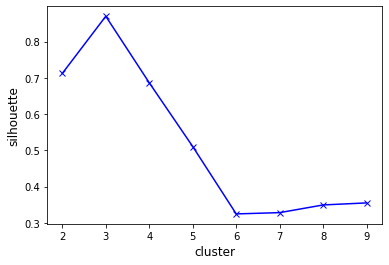

In [8]:
# Метод силуэта
# импортируем метрику силуэта
from sklearn.metrics import silhouette_score

# напишем функцию, как и при подсчёте метода локтя
def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, k_means.labels_)
    return silhouette

silhouette = []
for clust_num in range(2, 10):
    silhouette.append(get_silhouette(clust_num, X))

# визуализируем коэффициенты силуэта для разного количества кластеров
plt.xlabel("cluster", fontsize=12)
plt.ylabel("silhouette", fontsize=12)
plt.plot([i for i in range(2, 10)], silhouette, 'xb-')

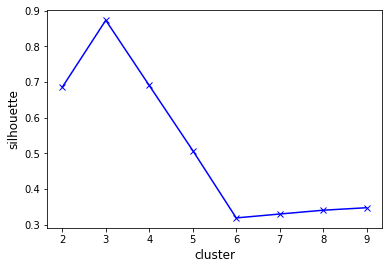

In [3]:
# 2.7
# Вам как специалисту по анализу данных поступили показания с прибора, 
# измеряющего количество нитратов и пестицидов в разных фруктах и овощах.

# Значения количества пестицидов и нитратов записаны в столбцы с названиями x1 и x2.

# Основываясь на этих двух свойствах, кластеризуйте данные и, используя коэффициент силуэта, найдите оптимальное количество кластеров.

data = pd.read_csv('data/values_from_the_instrument.csv')
X = data[['x1', 'x2']]

# импортируем метрику силуэта
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt

# напишем функцию, как и при подсчёте метода локтя
def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, k_means.labels_)
    return silhouette

silhouette = []
for clust_num in range(2, 10):
    silhouette.append(get_silhouette(clust_num, X))

# визуализируем коэффициенты силуэта для разного количества кластеров
plt.xlabel("cluster", fontsize=12)
plt.ylabel("silhouette", fontsize=12)
plt.plot([i for i in range(2, 10)], silhouette, 'xb-')

# Метрики

## Однородность кластеров

In [11]:
# импортируем подсчёт метрики однородности кластеров
from sklearn.metrics.cluster import homogeneity_score

In [12]:
# передадим информацию о том, какие на самом деле должны быть кластеры и результаты предсказания
print(homogeneity_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))
#>1.0

1.0


## Полнота кластера

In [15]:
# импортируем метрику полноты
from sklearn.metrics.cluster import completeness_score
# посчитаем, насколько полными получились кластеры с покемонами
print(completeness_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))


1.0


## V-мера

In [17]:
# импортируем из библиотеки sklearn подсчёт V-меры
from sklearn.metrics import v_measure_score

# посчитаем V-меру для кластеров с покемонами
print(v_measure_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))


1.0


## Индекс Рэнда

In [18]:
# импортируем из библиотеки sklearn подсчёт индекса Рэнда
from sklearn.metrics.cluster import rand_score

In [19]:
# 3.3
# Для пяти объектов вы провели кластеризацию k-means. 
# Известно, что объекты должны относиться к следующим кластерам: 1, 2, 2, 1, 0. 
# В ходе работы алгоритма вы получили следующие предсказания для каждого элемента: 1, 0, 2, 1, 2.

#Рассчитайте метрику однородности полученных кластеров. Введите полученное значение, округлив его до второго знака после точки-разделителя.

y_pred = [1, 0, 2, 1, 2]
y = [1, 2, 2, 1, 0]

print(homogeneity_score(labels_true=y, labels_pred=y_pred))

0.737175493807016


# Иерархическая кластеризация

In [20]:
# импортируем алгомеративную кластеризацию из sklearn
from sklearn.cluster import AgglomerativeClustering


# запускаем агломеративную кластеризацию
agglomerative_clustering = AgglomerativeClustering(n_clusters=2)

# обучаем модель
agglomerative_clustering.fit(X)

# получаем метки c информацией, к какому кластеру относятся объекты
agglomerative_clustering.labels_

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1])

# EM-КЛАСТЕРИЗАЦИЯ

In [21]:
# импортируем библиотеки numpy и sklearn
import numpy as np
from sklearn.mixture import GaussianMixture

gm_clustering = GaussianMixture(n_components=3, random_state=42)

# обучаем модель 
gm_clustering.fit(X)

# для матрицы X получаем предсказания, к какому кластеру принадлежат объекты
gm_prediction = gm_clustering.predict(X)

<AxesSubplot:xlabel='price', ylabel='year'>

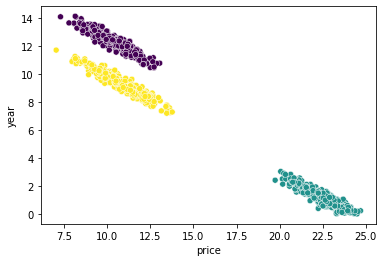

In [23]:
# 5.4
# Скачайте датасет, в котором представлены цены на однокомнатные квартиры и возраст этих квартир. 
# Проведите кластеризацию GMM, используя два признака: цену и возраст квартир. Какое оптимальное количество кластеров получилось?

h_data = pd.read_csv('data/housing.csv')
X = h_data

# обучаем модель 
gm_clustering.fit(X)

# для матрицы X получаем предсказания, к какому кластеру принадлежат объекты
gm_prediction = gm_clustering.predict(X)

#визуализируем результаты. Параметр c принимает вектор с номерами классов для группировки объектов по цветам 
sns.scatterplot(x=h_data.price, y=h_data.year, c=gm_prediction)

<AxesSubplot:xlabel='price', ylabel='year'>

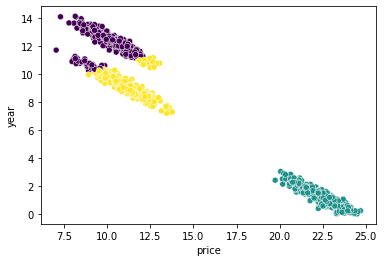

In [25]:
# 5.5
# Для датасета из предыдущего задания проведите кластеризацию с помощью алгоритма k-means. Какой алгоритм справился с задачей лучше?


# инициализируем алгоритм k-means с количеством кластеров 3
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)

# запустим обучение модели
kmeans.fit(X)

# предскажем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(X)

#визуализируем результаты. Параметр c принимает вектор с номерами классов для группировки объектов по цветам 
sns.scatterplot(x=h_data.price, y=h_data.year, c=predictions)

# Спектральная кластеризация

<AxesSubplot:xlabel='Attack', ylabel='Defense'>

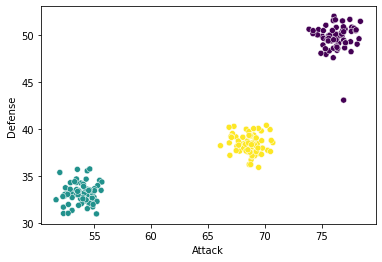

In [29]:
# вызываем из sklearn SpectralClustering 
from sklearn.cluster import SpectralClustering


# запускаем кластеризацию, задав количество кластеров, равное 3 
spectral_clustering = SpectralClustering(n_clusters=3, random_state=42)

spectral_clustering.fit(df[['Attack', 'Defense']])
# получаем результаты кластеризации
spectral_predictions = spectral_clustering.labels_

sns.scatterplot(x=df.Attack, y=df.Defense, c=spectral_predictions)

# DBSCAN

<AxesSubplot:xlabel='Attack', ylabel='Defense'>

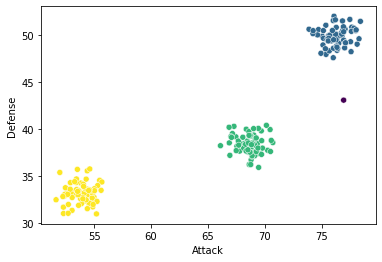

In [31]:
# импортируем DBSCAN-кластеризацию
from sklearn.cluster import DBSCAN

#запускаем кластеризацию на наших данных
clustering = DBSCAN(eps=3, min_samples=3).fit(df[['Attack', 'Defense']])

# Далее можно визуализировать результаты, как мы делали это с алгоритмом k-means
sns.scatterplot(x=df.Attack, y=df.Defense, c=clustering.labels_)

<AxesSubplot:xlabel='price', ylabel='year'>

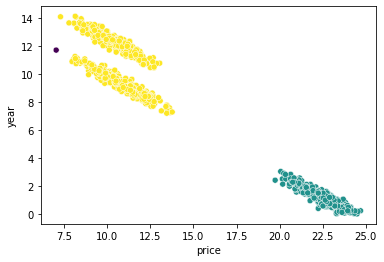

In [38]:
# 7.4
# Для датасета с ценами квартир проведите кластеризацию DBSCAN с параметрами по умолчанию. 
# Визуализируйте результаты. Сколько точек было размечено как выбросы?

X = h_data

#запускаем кластеризацию на наших данных
clustering = DBSCAN(eps=1.15, min_samples=2).fit(X)

# Далее можно визуализировать результаты, как мы делали это с алгоритмом k-means
sns.scatterplot(x=h_data.price, y=h_data.year, c=clustering.labels_)

# Визуализация результатов кластеризации

Рассмотрим кластеризацию по двум признакам, а именно — выделим группы жилья по локации. К текущим признакам добавим цену и рассмотрим, как локация влияет на цену.

In [4]:
# импортируем библиотеки, которые нам понадобятся для работы с датафреймом, кластеризацией и визуализацией
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

df = pd.read_csv("data/airbnb.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


<AxesSubplot:xlabel='latitude', ylabel='longitude'>

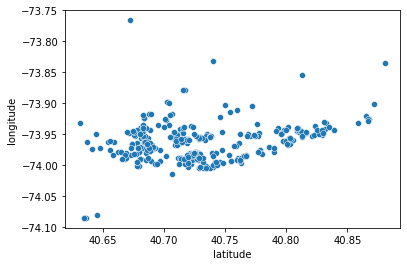

In [5]:
sns.scatterplot(x=df.latitude, y=df.longitude)

In [6]:
# инициализируем k-means-кластеризацию с шестью кластерами
kmeans_clustering = KMeans(n_clusters=6)

# обучим k-means-модель кластеризации на данных о широте и долготе, сохраним данные о кластерах в predictions
predictions = kmeans_clustering.fit_predict(df[['latitude', 'longitude']])

# сохраним предсказания в колонку clusters датафрейма
df["clusters"] = predictions


# с помощью метода cluster_centers_ найдём координаты центроидов кластеров, сохраним их в список centroids
centroids = kmeans_clustering.cluster_centers_

# для шести кластеров сохраним в отдельные списки значения координат x и y
centroids_x = [i[0] for i in centroids]
centroids_y = [i[1] for i in centroids]

# зададим цвета для разных кластеров
colors = ['#DF2020', '#81DF20', '#2095DF', '#DF20C8', '#20DFC5', '#DF8520']

# создадим пустые словари, чтобы потом соотнести координаты x и у центроидов разных кластеров, а также цвета 
centroids_x_dict = {}
centroids_y_dict = {}
colors_dict = {}

# итерируемся шесть раз, так как у нас шесть кластеров
for i in range(6):
    # сохраняем в словарь номер кластера в качестве ключа, значение координаты x центроида — в качестве значения
    centroids_x_dict[i] = centroids_x[i]
    # сохраняем в словарь номер кластера в качестве ключа, значение координаты y центроида — в качестве значения
    centroids_y_dict[i] = centroids_y[i]
    # сохраняем в словарь номер кластера в качестве ключа, значение цвета — в качестве значения
    colors_dict[i] = colors[i]

In [7]:
df['cen_x'] = df.clusters.map(centroids_x_dict) 
df['cen_y'] = df.clusters.map(centroids_y_dict)
df['color'] = df.clusters.map(colors_dict)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,clusters,cen_x,cen_y,color
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,1,40.677937,-73.967837,#81DF20
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,5,40.735543,-73.988864,#DF8520
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,0,40.812241,-73.943805,#DF2020
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,1,40.677937,-73.967837,#81DF20
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,0,40.812241,-73.943805,#DF2020


<AxesSubplot:xlabel='latitude', ylabel='longitude'>

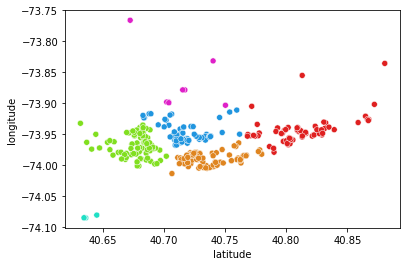

In [8]:
sns.scatterplot(x=df.latitude, y=df.longitude, c=df.color)

Если точек слишком много или мало, может понадобиться уменьшить или увеличить их размер. В этом поможет переменная s.

Также могут встретиться перекрывающиеся кластеры — а таком случае нужно, чтобы цвета объектов в кластере были полупрозрачными. В этом поможет переменная alpha: чем ближе её значение к 1, тем менее прозрачны объекты на графике.

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

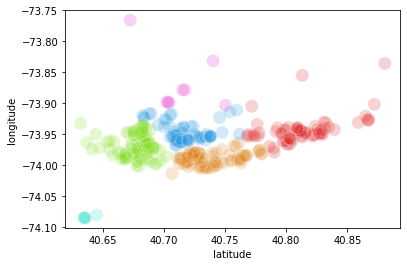

In [9]:
sns.scatterplot(x=df.latitude, y=df.longitude, c=df.color, alpha=0.2, s=170)

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

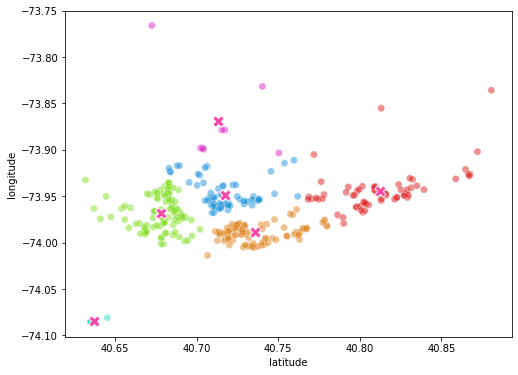

In [10]:
fig, axes = plt.subplots(figsize=(8, 6))
# визуализируем элементы датасета
# параметр c отвечает за цвет элемента в зависимости от того, к какому кластеру он принадлежит
# s отвечает за размер объектов на графике, alpha отвечает за прозрачность точек
sns.scatterplot(x=df.latitude, y=df.longitude, c=df.color, s=50, alpha=0.5)
# визуализируем центроиды: отметим их на графике крестиком (marker="X") и зададим им розовый цвет 
sns.scatterplot(x=centroids_x, y=centroids_y, marker="X", c=['#FC46AA'], s=130)

### CONVEX HULL

In [15]:
from scipy.spatial import ConvexHull 
import numpy as np

In [16]:
points = np.array([[ 40.64524, -74.08088], [ 40.63536, -74.08537], [ 40.63627, -74.08543], [ 40.63518, -74.08546], [ 40.63481, -74.08519]])
hull = ConvexHull(points)
hull.vertices

array([0, 4, 3, 2], dtype=int32)

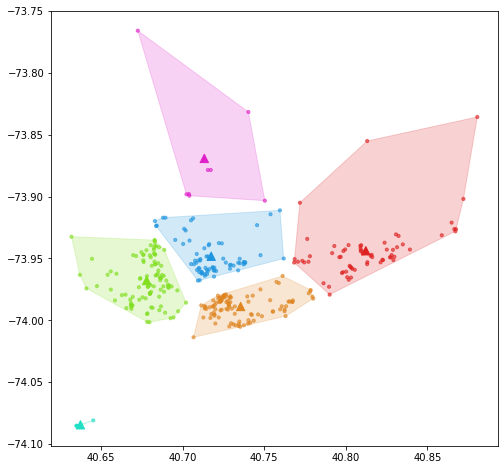

In [17]:
fig, ax = plt.subplots(1, figsize=(8,8))

# визуализируем объекты кластеров и центроиды
plt.scatter(df.latitude, df.longitude, c=df.color, alpha = 0.6, s=10)
plt.scatter(centroids_x, centroids_y, marker='^', c=colors, s=70)

# найдём уникальные значения кластеров и проитерируемся по каждому кластеру
for i in df.clusters.unique():
    # запишем в points значения признаков широты и долготы, принадлежащие к i-му кластеру
    points = df[df.clusters == i][['latitude', 'longitude']].values
 
    hull = ConvexHull(points)
    
    # Запишем координаты оболочки по оси x. Из hull.vertices узнаем индексы элементов, входящих в оболочку.
    # Так как оболочка должна быть замкнутой, то в конце добавляем ещё раз нулевой элемент.
    x_hull = np.append(points[hull.vertices, 0], points[hull.vertices, 0][0]) 
    y_hull = np.append(points[hull.vertices, 1], points[hull.vertices, 1][0]) 
    
    # рисуем оболочку и заливаем её таким же цветом, как и объекты кластера
    plt.fill(x_hull, y_hull, alpha=0.2, c=colors[i])

# ДЕНДРОГРАММА

In [18]:
# импортируем агломеративную кластеризацию из sklearn
from sklearn.cluster import AgglomerativeClustering

# запускаем агломеративную кластеризацию, расстояние между кластерами рассчитываем методом одиночной связи
agglomerative_clustering = AgglomerativeClustering(n_clusters=6, linkage='single')

# обучаем модель и получаем результаты кластеризации
predictions_ag_model = agglomerative_clustering.fit_predict(df[['latitude', 'longitude']])

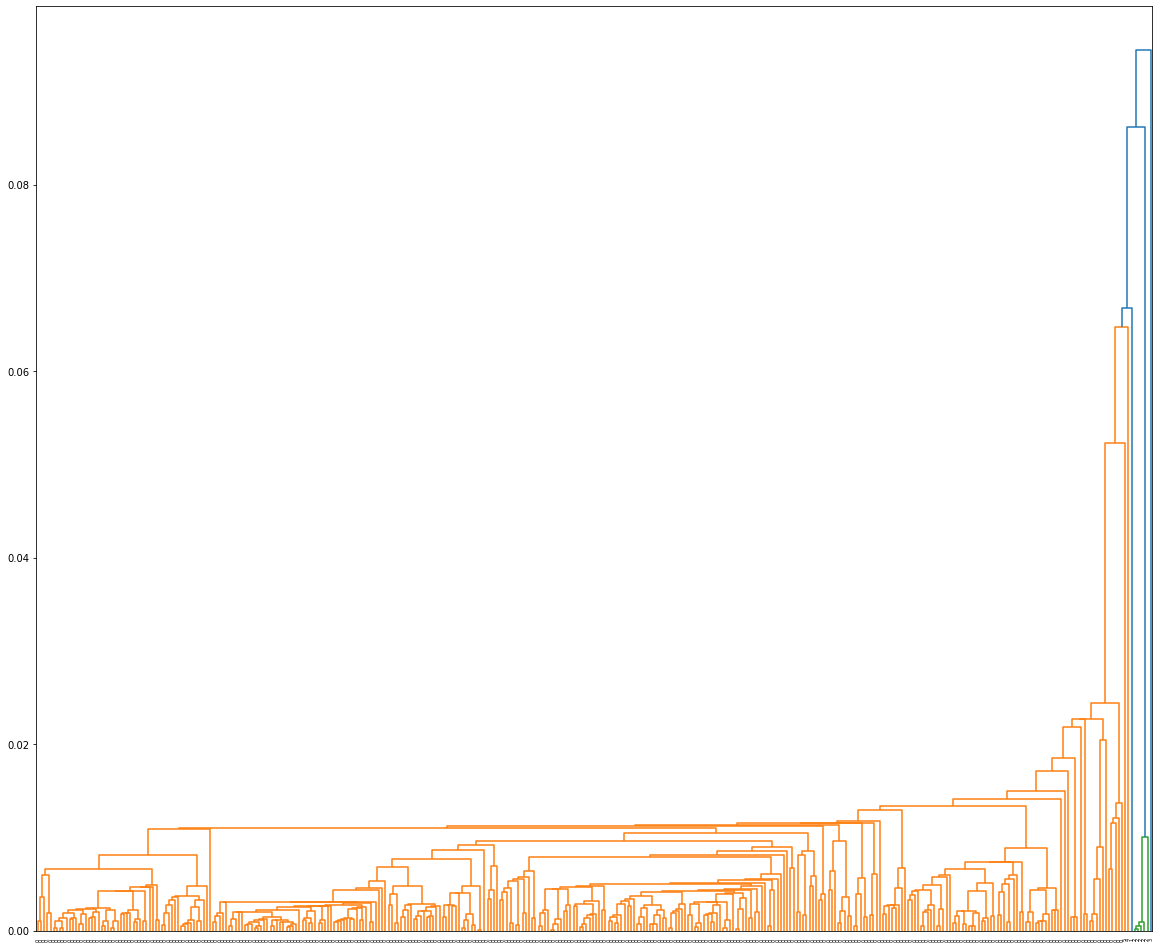

In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# рассчитаем расстояния между кластерами
linked = linkage(df[["latitude", "longitude"]], 'single')

plt.figure(figsize=(20, 17))

# визуализируем дендрограмму с ориентацией top
# сначала будут отрисовываться кластеры с минимальным расстоянием между ними
dendrogram(Z=linked,
            orientation='top',
            labels=predictions_ag_model,
            distance_sort='descending')

plt.show()

### CLUSTERGRAM

Построить такой график можно не для всех алгоритмов кластеризации, а только для k-means, GMM и иерархической кластеризации. Метод кластеризации задаётся в поле method, по умолчанию выбрана k-means-кластеризация.

K=1 skipped. Mean computed from data directly.
K=2 fitted in 0.01007390022277832 seconds.
K=3 fitted in 0.01322317123413086 seconds.
K=4 fitted in 0.011476993560791016 seconds.
K=5 fitted in 0.01127314567565918 seconds.
K=6 fitted in 0.012407779693603516 seconds.
K=7 fitted in 0.011104822158813477 seconds.
K=8 fitted in 0.011868000030517578 seconds.


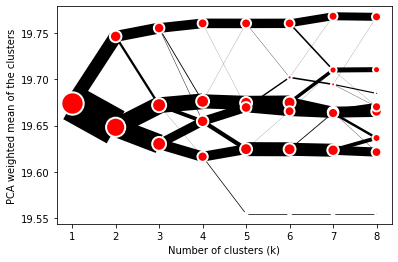

In [21]:
# импортируем библиотеку clustergram
from clustergram import Clustergram

# задаём количество кластеров, для которых хотим получить визуализацию, определяем метод кластеризации
cgram = Clustergram(range(1, 9), method='kmeans')

# запускаем алгоритм
cgram.fit(df[["latitude", "longitude"]])
cgram.plot();

### 3D-ВИЗУАЛИЗАЦИЯ

In [22]:
# инициализируем k-means-кластеризацию с шестью кластерами
kmeans_clustering = KMeans(n_clusters=6)

# обучим k-means-модель кластеризации на данных широты, долготы и цены, сохраним данные о кластерах для этих данных в kmeans_predictions
kmeans_predictions = kmeans_clustering.fit_predict(df[['latitude', 'longitude', 'price']])

# сохраним предсказания в колонку clusters датафрейма
df["clusters_3d"] = kmeans_predictions

/var/folders/tp/mcxy8wd524b65_m2_4n493dh0000gn/T/ipykernel_752/2588438326.py:7: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


Text(0.5, 0, 'price')

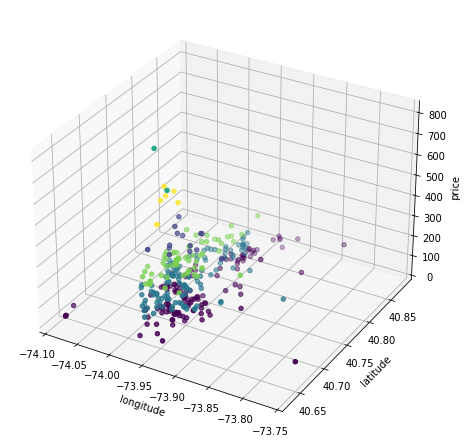

In [25]:
#Визуализация с помощью библиотеки Matplotlib:

from mpl_toolkits.mplot3d import Axes3D

# создадим трёхмерный объект
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
# добавим дополнительную ось в объект картинки
fig.add_axes(ax)

# визуализируем данные, передав значения x, y, z, а также информацию о группировке данных по цветам
ax.scatter(df.longitude.to_list(), df.latitude.to_list(), df.price.to_list(), c=df.clusters_3d)
# добавим оси
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_zlabel('price')

/var/folders/tp/mcxy8wd524b65_m2_4n493dh0000gn/T/ipykernel_752/1430286303.py:7: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


Text(0.5, 0, 'price')

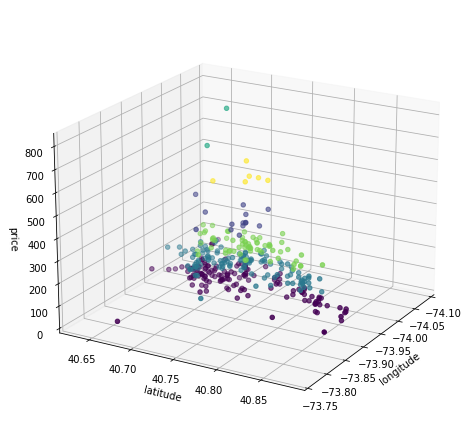

In [27]:
# Изменим угол визуализации: 

from mpl_toolkits.mplot3d import Axes3D

# создадим трёхмерный объект
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
# добавим дополнительную ось в объект картинки
fig.add_axes(ax)

ax.azim = 30
ax.elev = 20

# визуализируем данные, передав значения x, y, z, а также информацию о группировке данных по цветам
ax.scatter(df.longitude.to_list(), df.latitude.to_list(), df.price.to_list(), c=df.clusters_3d)
# добавим оси
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_zlabel('price')

In [28]:
import plotly
import plotly.express as px

# передаём датафрейм и поля, которые нужно использовать для осей абсцисс, ординат и аппликат
# в значение color передаём номера кластеров
fig = px.scatter_3d(
    data_frame=df, 
    x = 'longitude', 
    y = 'latitude', 
    z = 'price', 
    color='clusters', 
    width=1000,
    height=700
)

#отображаем график
fig.show()

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0],
  [45.0, 45.0, 55.0, 55.0],
  [50.0, 50.0, 65.0, 65.0],
  [20.0, 20.0, 57.5, 57.5],
  [75.0, 75.0, 85.0, 85.0],
  [80.0, 80.0, 95.0, 95.0],
  [105.0, 105.0, 115.0, 115.0],
  [110.0, 110.0, 125.0, 125.0],
  [87.5, 87.5, 117.5, 117.5],
  [135.0, 135.0, 145.0, 145.0],
  [140.0, 140.0, 155.0, 155.0],
  [165.0, 165.0, 175.0, 175.0],
  [147.5, 147.5, 170.0, 170.0],
  [102.5, 102.5, 158.75, 158.75],
  [38.75, 38.75, 130.625, 130.625],
  [185.0, 185.0, 195.0, 195.0],
  [190.0, 190.0, 205.0, 205.0],
  [197.5, 197.5, 215.0, 215.0],
  [225.0, 225.0, 235.0, 235.0],
  [230.0, 230.0, 245.0, 245.0],
  [237.5, 237.5, 255.0, 255.0],
  [206.25, 206.25, 246.25, 246.25],
  [226.25, 226.25, 265.0, 265.0],
  [84.6875, 84.6875, 245.625, 245.625],
  [275.0, 275.0, 285.0, 285.0],
  [280.0, 280.0, 295.0, 295.0],
  [305.0, 305.0, 315.0, 315.0],
  [310.0, 310.0, 325.0, 325.0],
  [335.0, 335.0, 345.0, 345.0],
  [317.5, 317.

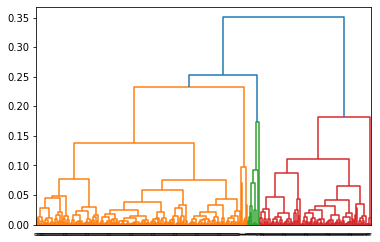

In [32]:
# 8.4
# Для датасета Airbnb проведите иерархическую алгомеративную кластеризацию с использованием sklearn. 
# В качестве признаков для кластеризации используйте latitude и longitude из датафрейма, количество кластеров для кластеризации — 6. 
# Расстояние между кластерами рассчитайте методом полной связи, направление дендрограммы — top.

# Визуализируйте дендрограмму для проведённой кластеризации. 
# На сколько кластеров можно разделить датасет, если расстояние между кластерами будет равно 0.25?

data = pd.read_csv('data/airbnb.csv')
X = data[['latitude', 'longitude']]

# импортируем алгомеративную кластеризацию из sklearn
from sklearn.cluster import AgglomerativeClustering


# запускаем агломеративную кластеризацию
agglomerative_clustering = AgglomerativeClustering(n_clusters=6, linkage='complete')

# обучаем модель
agglomerative_clustering.fit(X)

# рассчитаем расстояния между кластерами
linked = linkage(X, 'complete')

# обучаем модель и получаем результаты кластеризации
predictions_ag_model = agglomerative_clustering.fit_predict(X)

# визуализируем дендрограмму с ориентацией top
# сначала будут отрисовываться кластеры с минимальным расстоянием между ними
dendrogram(Z=linked,
            orientation='top',
            labels=predictions_ag_model,
            distance_sort='descending')

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

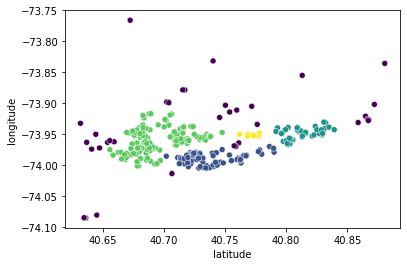

In [34]:
# 8.5
# Для датасета Airbnb проведите DBSCAN-кластеризацию. В качестве признаков для кластеризации используйте latitude и longitude. 
# Параметры для алгоритма кластеризации: eps=0.012, min_samples=6.

#Визуализируйте результаты. При визуализации используйте distance_sort=descending. Сколько кластеров получилось на графике?

# импортируем DBSCAN-кластеризацию
from sklearn.cluster import DBSCAN

#запускаем кластеризацию на наших данных
clustering = DBSCAN(eps=0.012, min_samples=6).fit(X)

sns.scatterplot(x=data.latitude, y=data.longitude, c=clustering.fit_predict(X))

# PCA и t-SNE, или зачем понижать размерность?

## PCA

In [36]:
# Рассмотрим, как запустить PCA с помощью библиотеки sklearn:

# из модуля decomposition библиотеки sklearn импортируем класс PCA
from sklearn.decomposition import PCA
# создаём объект класса PCA
# n_components — задаём количество компонентов для проведения трансформации
pca = PCA(n_components=2, random_state=42)
# обучаем модель на данных X
pca.fit(X)
# применяем уменьшение размерности к матрице X
pca.transform(X)

#Также мы можем сразу обучить модель и применить трансформацию уменьшения размерности:

pca.fit_transform(X)

array([[-8.02560488e-02,  1.39531934e-02],
       [ 1.90598177e-02, -2.51606862e-02],
       [ 8.35739530e-02,  5.33345118e-04],
       [-4.06105120e-02,  1.61363144e-02],
       [ 7.28858289e-02,  1.30289283e-03],
       [ 1.56462863e-02, -1.51275808e-02],
       [-3.79258166e-02,  1.93394395e-02],
       [ 2.96196213e-02, -2.92654451e-02],
       [ 6.98810248e-02, -2.19728811e-02],
       [-2.14328130e-02, -2.08782498e-02],
       [ 7.16833468e-02, -2.06221644e-02],
       [ 2.46462513e-02, -3.17774345e-02],
       [-6.42853657e-02, -6.42703432e-03],
       [ 6.81031644e-02, -1.51582195e-02],
       [-4.29693388e-03, -4.10186481e-02],
       [-1.65574172e-02,  1.59980016e-02],
       [-3.74981301e-02,  2.74289516e-03],
       [ 4.79974515e-03, -3.28987694e-02],
       [-4.61040300e-02,  3.09411130e-02],
       [ 7.00318511e-02, -2.81818843e-03],
       [-7.83643350e-03,  9.80586604e-03],
       [-4.94854488e-02,  6.33798551e-04],
       [-5.05006272e-02, -4.13406771e-05],
       [-5.

In [37]:
# загрузим датасет MNIST
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

dataset = fetch_openml("mnist_784")
# загрузим признаки в переменную X  
X = dataset['data']
# загрузим «ответы» в переменную y
y = dataset['target']
# разделим данные с помощью sklearn на данные для обучения и теста
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.1, random_state=0)

# импортируем StandardScaler для стандартизации данных
from sklearn.preprocessing import StandardScaler

# создадим объект класса StandardScaler
scaler = StandardScaler()
scaler.fit(train_x)
# трансформируем датасеты train_x и test_x
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

# импортируем класс PCA
from sklearn.decomposition import PCA

# создадим объект класса PCA
pca = PCA(n_components=300)
pca.fit(train_x)
# уменьшим размерность данных
train_x_pca = pca.transform(train_x)
test_x_pca = pca.transform(test_x)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/datasets/_openml.py:91: UserWarning:

A network error occurred while downloading https://openml.org/api/v1/json/data/list/data_name/mnist_784/limit/2/status/active/. Retrying...



URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:997)>

In [ ]:
print(len(train_x[0]))
print(len(train_x_pca[0]))

In [ ]:
# Напишем функцию, которая будет принимать на вход данные для обучения (матрицу с признаками и правильные ответы) 
# и данные для тестирования модели, а на выходе будет возвращать время, затраченное на обучение модели, и качество модели. 
# В качестве метрики оценивания качества будем использовать метрику accuracy.

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# напишем функцию, которая на вход принимает X и y, а возвращает модель и время
def get_time_and_accuracy(train_x, train_y, test_x, test_y):
    # создадим объект класса LogisticRegression
    log_reg_model = LogisticRegression(max_iter=1000)
    from time import time
    # запишем время с начала эпохи в секундах до обучения модели
    start_time = time()
    # обучим модель
    log_reg_model.fit(train_x, train_y)    
    # запишем время с начала эпохи в секундах после обучения
    end_time = time()
    # подсчитаем время, потраченное на обучение модели
    time = end_time-start_time
    # предскажем на тестовых данных
    y_pred = log_reg_model.predict(test_x)
    # посчитаем скор для тестового предсказания
    score = accuracy_score(test_y, y_pred)
    # вернём время, потраченное на обучение, и качество полученной модели
    return time, score

model_pca_time, model_pca_acc = get_time_and_accuracy(train_x_pca, train_y, test_x_pca, test_y)
print(f"Модель, построенная на признаках, полученных после уменьшения размерности. Время обучения {model_pca_time}, метрика модели {model_pca_acc}")
# Модель, построенная на признаках, полученных после уменьшения размерности. Время обучения 54.12072825431824, метрика модели 0.9255714285714286

model_time, model_acc = get_time_and_accuracy(train_x, train_y, test_x, test_y)
print(f"Модель, построенная на всех исходных признаках. Время обучения {model_time}, метрика модели {model_acc}")
# Модель, построенная на всех исходных признаках. Время обучения 108.04033303260803, метрика модели 0.9187142857142857


## T-SNE

In [ ]:
# импортируем класс TSNE из модуля manifold библиотеки sklearn
from sklearn.manifold import TSNE

# создаём объект класса TSNE
# n_components — размерность нового пространства
tsne = TSNE(n_components=2, perplexity=30, n_iter=500, random_state=42)
# обучаем модель на данных X
tsne.fit(X)
# применяем уменьшение размерности к матрице X
tsne.transform(X)

# 10 ПРАКТИКА

In [39]:
# импортируем библиотеки для работы с данными
import pandas as pd
from sklearn import preprocessing 

# загрузим данные
df = pd.read_csv("data/segmented_customers.csv")
# посмотрим на данные
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,1,19.0,15.0,39.0
1,2,1,21.0,15.0,81.0
2,3,0,20.0,16.0,6.0
3,4,0,23.0,16.0,77.0
4,5,0,31.0,17.0,40.0


In [41]:
# посмотрим, есть ли пропуски в датасете
df[df.isna().any(axis=1)]

,customer_id,gender,age,annual_income,spending_score


In [42]:
# пропусков не так много, поэтому мы можем удалить данные с пропусками
df = df.dropna()

# переименуем столбцы для более удобной работы
df.rename(columns = {'CustomerID' : 'customer_id', 'Gender' : 'gender', 
                    'Age': 'age', 'Annual Income (k$)': 'annual_income', 
                    'Spending Score (1-100)': 'spending_score', }, inplace = True)

In [43]:
# проверим, есть ли в данных дубликаты
df[df.duplicated(subset=['customer_id'])]

,customer_id,gender,age,annual_income,spending_score


In [44]:
import plotly
import plotly.express as px

# передаём датафрейм и поля, которые нужно использовать для осей абсцисс, ординат и аппликат
fig = px.scatter_3d(
    data_frame=df, 
    x = 'age', 
    y = 'annual_income', 
    z = 'spending_score', 
    width=1000,
    height=700
)

#отображаем график
fig.show()

In [46]:
# функция для визуализации
def get_3d_visualization(df, clust_res):
    fig = px.scatter_3d(
        data_frame=df, 
        x = 'age', 
        y = 'annual_income', 
        z = 'spending_score', 
        color = clust_res,
        width=1000,
        height=700
    )

    #возвращаем график
    return fig

In [47]:
X = df[['age', 'annual_income', 'spending_score']]

In [51]:
# 10.1
# Попробуйте провести DBSCAN-кластеризацию со значениями по умолчанию. Сколько кластеров у вас получилось?


# импортируем DBSCAN-кластеризацию
from sklearn.cluster import DBSCAN

#запускаем кластеризацию на наших данных
clustering = DBSCAN(eps=0.012, min_samples=6).fit(X)
get_3d_visualization(df, clustering.labels_)


In [54]:
#Большая часть наших данных разрежённые, а чем больше разброс точек в датасете, 
# тем большее значение радиуса вокруг точки (eps) нужно задавать. 
# Так как данные разрежённые, попробуем увеличить значение eps до 11 и визуально оценим результат:

# импортируем DBSCAN-кластеризацию
from sklearn.cluster import DBSCAN

#запускаем кластеризацию на наших данных
dbscan = DBSCAN(eps=9, min_samples=6)
clustering_dbscan_res = dbscan.fit_predict(X)
df['dbscan_res_eps_11'] = clustering_dbscan_res

get_3d_visualization(df, 'dbscan_res_eps_11')

Проведём агломеративную кластеризацию, чтобы построить дендрограмму и по ней оценить количество кластеров, на которое можно разделить датасет. Напишем функцию, которая будет принимать количество кластеров и матрицу с признаками:

In [55]:
# импортируем алгомеративную кластеризацию из sklearn
from sklearn.cluster import AgglomerativeClustering

# напишем функцию, которая будет проводить алгомеративную кластеризацию
# на вход она будет принимать X — матрицу с признаками для кластеризации и n_clusters — количество кластеров,
# на выходе будет возвращать список с номерами кластеров
def get_aggl_clustering(X, n_clusters):
    # запустим агломеративную кластеризацию
    agglomerative_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    # обучим модель агломеративной кластеризации
    agglomerative_clustering.fit(X)
    # получим список c информацией, к какому кластеру относятся объекты
    aggl_prediction = agglomerative_clustering.labels_
    # вернём список с результатами
    return aggl_prediction

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [10.0, 10.0, 25.0, 25.0],
  [35.0, 35.0, 45.0, 45.0],
  [17.5, 17.5, 40.0, 40.0],
  [55.0, 55.0, 65.0, 65.0],
  [28.75, 28.75, 60.0, 60.0],
  [75.0, 75.0, 85.0, 85.0],
  [80.0, 80.0, 95.0, 95.0],
  [44.375, 44.375, 87.5, 87.5],
  [105.0, 105.0, 115.0, 115.0],
  [110.0, 110.0, 125.0, 125.0],
  [135.0, 135.0, 145.0, 145.0],
  [117.5, 117.5, 140.0, 140.0],
  [65.9375, 65.9375, 128.75, 128.75],
  [155.0, 155.0, 165.0, 165.0],
  [175.0, 175.0, 185.0, 185.0],
  [160.0, 160.0, 180.0, 180.0],
  [97.34375, 97.34375, 170.0, 170.0],
  [195.0, 195.0, 205.0, 205.0],
  [200.0, 200.0, 215.0, 215.0],
  [207.5, 207.5, 225.0, 225.0],
  [235.0, 235.0, 245.0, 245.0],
  [216.25, 216.25, 240.0, 240.0],
  [133.671875, 133.671875, 228.125, 228.125],
  [255.0, 255.0, 265.0, 265.0],
  [260.0, 260.0, 275.0, 275.0],
  [267.5, 267.5, 285.0, 285.0],
  [276.25, 276.25, 295.0, 295.0],
  [305.0, 305.0, 315.0, 315.0],
  [285.625, 285.625, 310.0, 310.0],
  [325.0, 325.0, 335.0, 335.

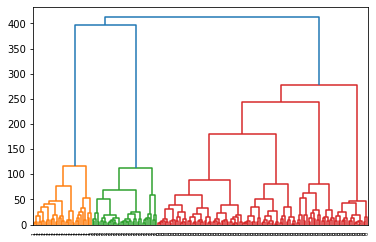

In [59]:
aggl_predict = get_aggl_clustering(X, 3)

# рассчитаем расстояния между кластерами
linked = linkage(X, 'ward')

# визуализируем дендрограмму с ориентацией top
# сначала будут отрисовываться кластеры с минимальным расстоянием между ними
dendrogram(Z=linked,
            orientation='top',
            labels=aggl_predict,
            distance_sort='descending')

In [60]:
df['aggl_res_6'] = get_aggl_clustering(df[['age', 'annual_income', 'spending_score']], 6)
get_3d_visualization(df, 'aggl_res_6')

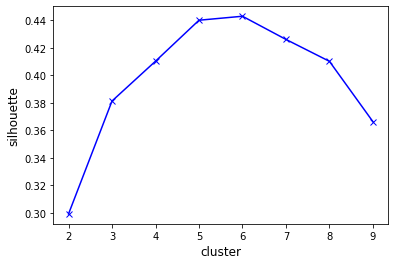

In [61]:
# 10.4
# Для агломеративной кластеризации самостоятельно с помощью коэффициента силуэта подберите оптимальное количество кластеров. 
# Сколько кластеров у вас получилось?

# Метод силуэта
# импортируем метрику силуэта
from sklearn.metrics import silhouette_score

# напишем функцию, как и при подсчёте метода локтя
def get_silhouette(cluster_num, X):
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, get_aggl_clustering(X, cluster_num))
    return silhouette

silhouette = []
for clust_num in range(2, 10):
    silhouette.append(get_silhouette(clust_num, X))



# визуализируем коэффициенты силуэта для разного количества кластеров
plt.xlabel("cluster", fontsize=12)
plt.ylabel("silhouette", fontsize=12)
plt.plot([i for i in range(2, 10)], silhouette, 'xb-')